In [1]:
import pandas

In [2]:
import geopandas

/tmp/ipykernel_3899390/1529612126.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [3]:
gdf = geopandas.read_file("./data/shared/covid/gz_2010_us_040_00_500k.json")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [4]:
gdf.head()

GEO_ID STATE           NAME LSAD  CENSUSAREA  \
0  0400000US23    23          Maine        30842.923   
1  0400000US25    25  Massachusetts         7800.058   
2  0400000US26    26       Michigan        56538.901   
3  0400000US30    30        Montana       145545.801   
4  0400000US32    32         Nevada       109781.180   

                                            geometry  
0  MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...  
1  MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...  
2  MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...  
3  POLYGON ((-104.05770 44.99743, -104.25015 44.9...  
4  POLYGON ((-114.05060 37.00040, -114.04999 36.9...

In [5]:
gdf.columns.values

array(['GEO_ID', 'STATE', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry'],
      dtype=object)

<AxesSubplot:>

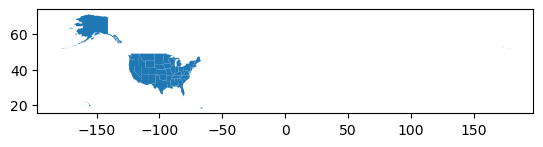

In [6]:
gdf.plot()

## Table Join with remote data

In [7]:
gdf.rename(columns={'NAME': 'state'}, inplace=True)
gdf.head()

GEO_ID STATE          state LSAD  CENSUSAREA  \
0  0400000US23    23          Maine        30842.923   
1  0400000US25    25  Massachusetts         7800.058   
2  0400000US26    26       Michigan        56538.901   
3  0400000US30    30        Montana       145545.801   
4  0400000US32    32         Nevada       109781.180   

                                            geometry  
0  MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...  
1  MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...  
2  MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...  
3  POLYGON ((-104.05770 44.99743, -104.25015 44.9...  
4  POLYGON ((-114.05060 37.00040, -114.04999 36.9...

In [8]:
table = pandas.read_html('https://www.pewresearch.org/religion/religious-landscape-study/compare/party-affiliation/by/state/')

In [9]:
table

[                   State Republican/lean Rep. No lean Democrat/lean Dem.  \
 0                Alabama                  52%     13%                35%   
 1                 Alaska                  39%     29%                32%   
 2                Arizona                  40%     21%                39%   
 3               Arkansas                  46%     16%                38%   
 4             California                  30%     21%                49%   
 5               Colorado                  41%     17%                42%   
 6            Connecticut                  32%     18%                50%   
 7               Delaware                  29%     17%                55%   
 8   District of Columbia                  11%     15%                73%   
 9                Florida                  37%     19%                44%   
 10               Georgia                  41%     18%                41%   
 11                Hawaii                  28%     20%                51%   

In [10]:
len(table)

1

In [11]:
df = table[0]
df.head()

State Republican/lean Rep. No lean Democrat/lean Dem.  Sample\tsize
0     Alabama                  52%     13%                35%           511
1      Alaska                  39%     29%                32%           310
2     Arizona                  40%     21%                39%           653
3    Arkansas                  46%     16%                38%           311
4  California                  30%     21%                49%          3697

In [12]:
df.columns

Index(['State', 'Republican/lean Rep.', 'No lean', 'Democrat/lean Dem.',
       'Sample\tsize'],
      dtype='object')

In [13]:
df = df.rename(columns={df.columns[1]: 'Rep'})

In [14]:
df.head()

State  Rep No lean Democrat/lean Dem.  Sample\tsize
0     Alabama  52%     13%                35%           511
1      Alaska  39%     29%                32%           310
2     Arizona  40%     21%                39%           653
3    Arkansas  46%     16%                38%           311
4  California  30%     21%                49%          3697

In [15]:
df['rep_int']= df.Rep.str.replace("%","").astype(int)

In [16]:
df.head()

State  Rep No lean Democrat/lean Dem.  Sample\tsize  rep_int
0     Alabama  52%     13%                35%           511       52
1      Alaska  39%     29%                32%           310       39
2     Arizona  40%     21%                39%           653       40
3    Arkansas  46%     16%                38%           311       46
4  California  30%     21%                49%          3697       30

In [17]:
df = df.rename(columns={'State':'state'})

In [18]:
df

state  Rep No lean Democrat/lean Dem.  Sample\tsize  \
0                Alabama  52%     13%                35%           511   
1                 Alaska  39%     29%                32%           310   
2                Arizona  40%     21%                39%           653   
3               Arkansas  46%     16%                38%           311   
4             California  30%     21%                49%          3697   
5               Colorado  41%     17%                42%           504   
6            Connecticut  32%     18%                50%           377   
7               Delaware  29%     17%                55%           301   
8   District of Columbia  11%     15%                73%           303   
9                Florida  37%     19%                44%          2020   
10               Georgia  41%     18%                41%           968   
11                Hawaii  28%     20%                51%           312   
12                 Idaho  49%     19%                32%           320   
13              Illinois  33%     19%                48%          1326   
14               Indiana  42%     20%                37%           654   
15                  Iowa  41%     19%                40%           330   
16                Kansas  46%     23%                31%           307   
17              Kentucky  44%     13%                43%           439   
18             Louisiana  41%     16%                43%           465   
19                 Maine  36%     17%                47%           303   
20              Maryland  31%     14%                55%           644   
21         Massachusetts  27%     17%                56%           704   
22              Michigan  34%     19%                47%           982   
23             Minnesota  39%     15%                46%           563   
24           Mississippi  44%     14%                42%           309   
25              Missouri  41%     18%                42%           642   
26               Montana  49%     21%                30%           312   
27              Nebraska  47%     17%                36%           312   
28                Nevada  37%     18%                46%           314   
29         New Hampshire  35%     20%                44%           303   
30            New Jersey  30%     19%                51%           886   
31            New Mexico  37%     15%                48%           312   
32              New York  28%     19%                53%          1966   
33        North Carolina  41%     17%                43%          1022   
34          North Dakota  50%     18%                33%           338   
35                  Ohio  42%     18%                40%          1132   
36              Oklahoma  45%     15%                40%           391   
37                Oregon  32%     21%                47%           419   
38          Pennsylvania  39%     15%                46%          1366   
39          Rhode Island  30%     22%                48%           305   
40        South Carolina  43%     18%                39%           495   
41          South Dakota  53%     10%                37%           305   
42             Tennessee  48%     15%                36%           661   
43                 Texas  39%     21%                40%          2535   
44                  Utah  54%     16%                30%           315   
45               Vermont  29%     14%                57%           306   
46              Virginia  43%     18%                39%           882   
47            Washington  33%     23%                44%           714   
48         West Virginia  43%     16%                41%           309   
49             Wisconsin  42%     16%                42%           600   
50               Wyoming  57%     18%                25%           316   

    rep_int  
0        52  
1        39  
2        40  
3        46  
4        30  
5        41  
6        32  
7        29  
8        11  
9        37  
10       41  
11

In [19]:
join_gdf = gdf.merge(df, on='state')


In [20]:
join_gdf.head()

GEO_ID STATE          state LSAD  CENSUSAREA  \
0  0400000US23    23          Maine        30842.923   
1  0400000US25    25  Massachusetts         7800.058   
2  0400000US26    26       Michigan        56538.901   
3  0400000US30    30        Montana       145545.801   
4  0400000US32    32         Nevada       109781.180   

                                            geometry  Rep No lean  \
0  MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...  36%     17%   
1  MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...  27%     17%   
2  MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...  34%     19%   
3  POLYGON ((-104.05770 44.99743, -104.25015 44.9...  49%     21%   
4  POLYGON ((-114.05060 37.00040, -114.04999 36.9...  37%     18%   

  Democrat/lean Dem.  Sample\tsize  rep_int  
0                47%           303       36  
1                56%           704       27  
2                47%           982       34  
3                30%           312       49  
4                46%           314       37

In [21]:
drop = ['Alaska', 'Hawaii']
join_gdf = join_gdf[~join_gdf['state'].isin(drop)]
join_gdf.reset_index(inplace=True)

<AxesSubplot:>

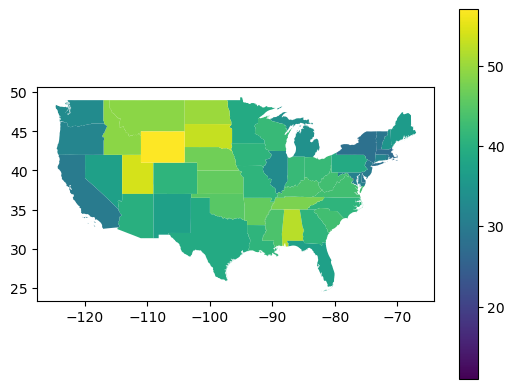

In [22]:
join_gdf.plot(column='rep_int', legend=True)

In [23]:
join_gdf = join_gdf.to_crs(join_gdf.estimate_utm_crs())

<AxesSubplot:>

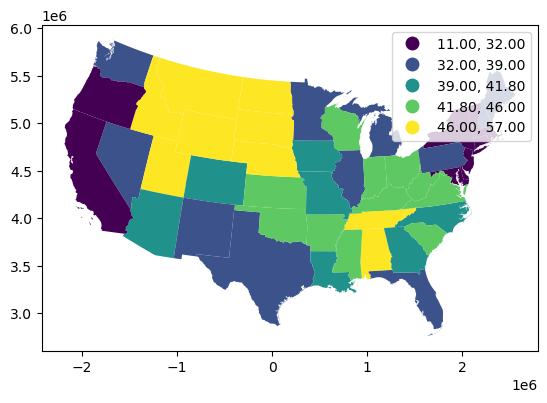

In [24]:
join_gdf.plot(column='rep_int', scheme='Quantiles', k=5, legend=True)

<AxesSubplot:>

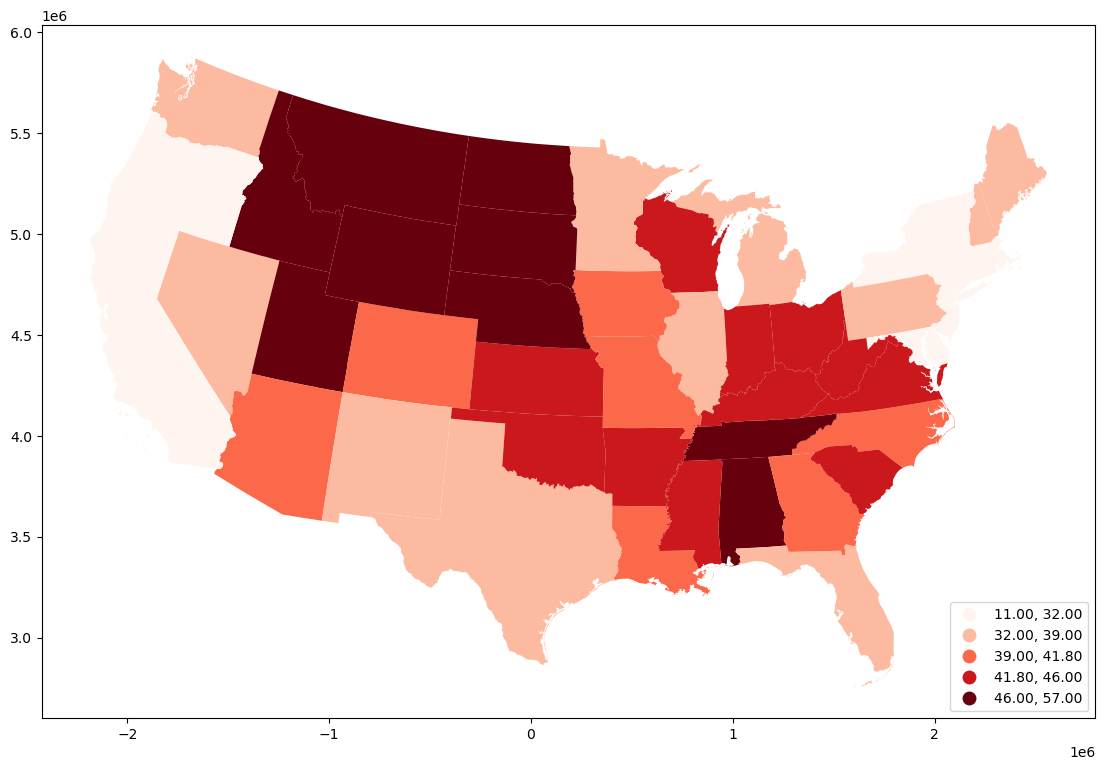

In [25]:
join_gdf.plot(column='rep_int', scheme='Quantiles', k=5, legend=True,
             figsize=(16,9), legend_kwds={'loc': 'lower right'},
             cmap='Reds')

<AxesSubplot:>

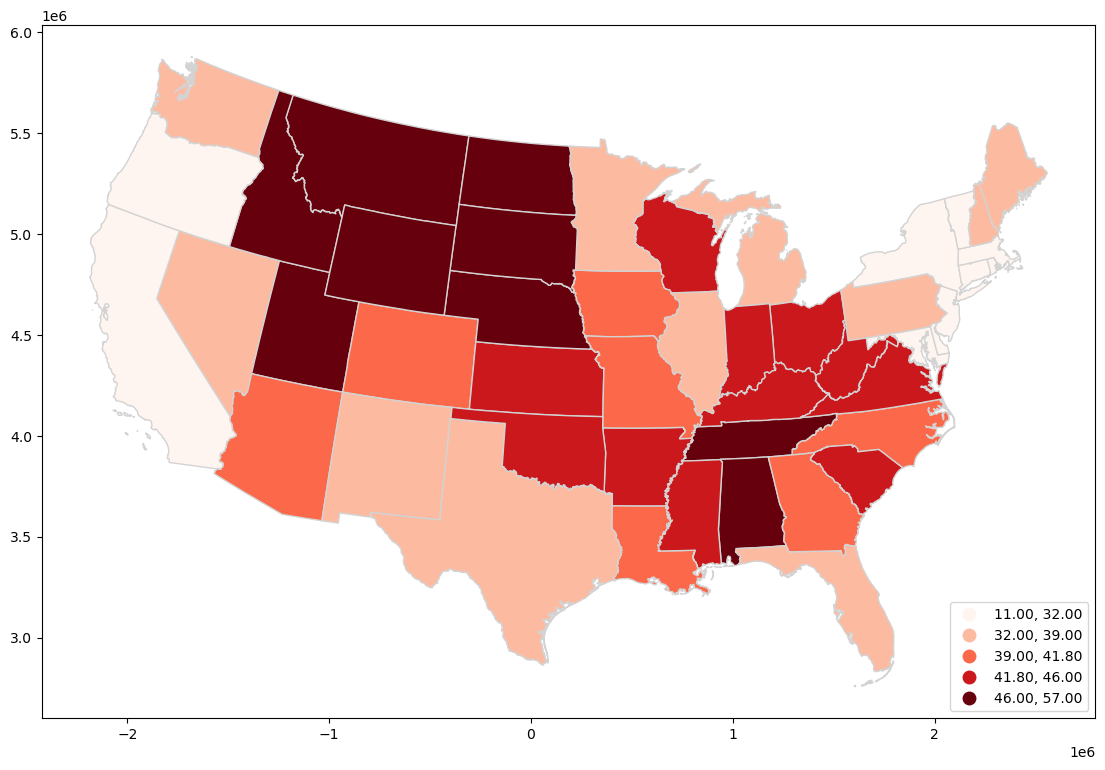

In [26]:
join_gdf.plot(column='rep_int', scheme='Quantiles', k=5, legend=True,
             figsize=(16,9), legend_kwds={'loc': 'lower right'},
             edgecolor='lightgrey',
             cmap='Reds')

In [27]:
import libpysal

/opt/tljh/user/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/opt/tljh/user/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/opt/tljh/user/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:199: N

In [28]:
w = libpysal.weights.Queen.from_dataframe(join_gdf)

In [29]:
w.n

49

In [30]:
w.pct_nonzero

9.079550187421907

In [31]:
from splot.libpysal import plot_spatial_weights



In [32]:
w.n

49

In [33]:
w.cardinalities

{0: 1,
 1: 5,
 2: 3,
 3: 4,
 4: 5,
 5: 3,
 6: 5,
 7: 4,
 8: 5,
 9: 6,
 10: 2,
 11: 8,
 12: 4,
 13: 6,
 14: 2,
 15: 4,
 16: 5,
 17: 4,
 18: 5,
 19: 6,
 20: 3,
 21: 7,
 22: 3,
 23: 3,
 24: 2,
 25: 2,
 26: 5,
 27: 6,
 28: 5,
 29: 4,
 30: 6,
 31: 4,
 32: 7,
 33: 3,
 34: 4,
 35: 4,
 36: 8,
 37: 6,
 38: 3,
 39: 5,
 40: 3,
 41: 6,
 42: 4,
 43: 2,
 44: 6,
 45: 3,
 46: 6,
 47: 5,
 48: 6}

In [34]:
w.histogram

[(1, 1), (2, 5), (3, 9), (4, 10), (5, 10), (6, 10), (7, 2), (8, 2)]

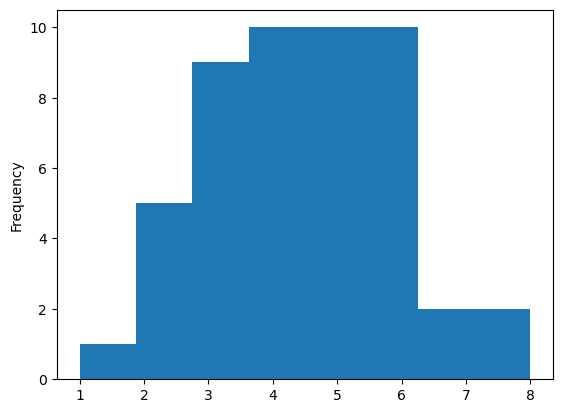

In [35]:
s = pandas.Series(w.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

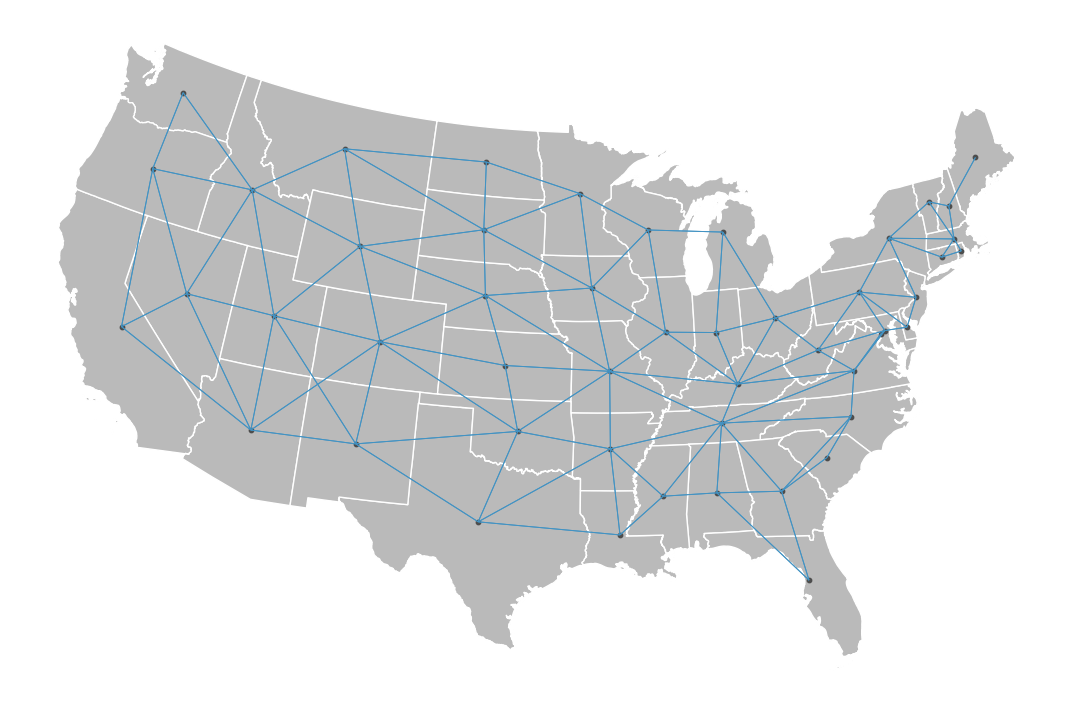

In [36]:
_ = plot_spatial_weights(w,join_gdf, figsize=(16,9))

In [37]:
join_gdf['queen_neighbors'] = w.cardinalities

<AxesSubplot:>

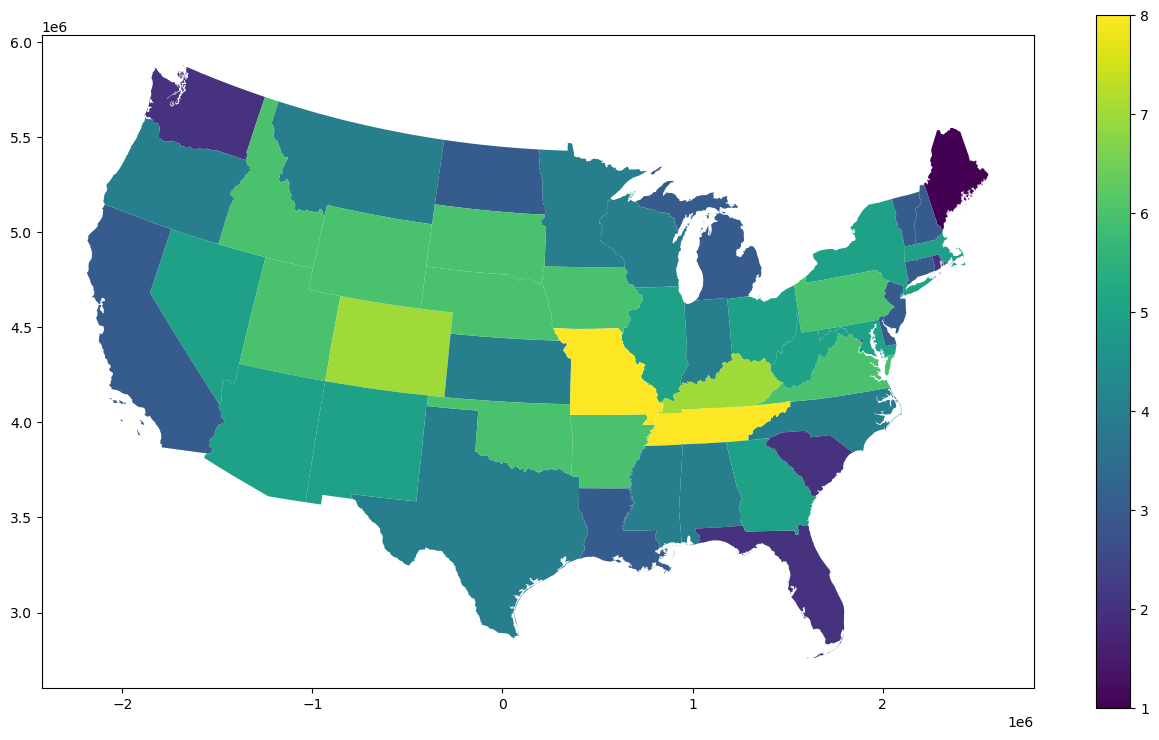

In [38]:
join_gdf.plot(column='queen_neighbors', legend=True, figsize=(16,9))

In [39]:
join_gdf.head()

index       GEO_ID STATE          state LSAD  CENSUSAREA  \
0      0  0400000US23    23          Maine        30842.923   
1      1  0400000US25    25  Massachusetts         7800.058   
2      2  0400000US26    26       Michigan        56538.901   
3      3  0400000US30    30        Montana       145545.801   
4      4  0400000US32    32         Nevada       109781.180   

                                            geometry  Rep No lean  \
0  MULTIPOLYGON (((2516172.424 5253443.650, 25164...  36%     17%   
1  MULTIPOLYGON (((2351724.597 4850457.653, 23526...  27%     17%   
2  MULTIPOLYGON (((821167.988 5338182.388, 821794...  34%     19%   
3  POLYGON ((-371533.418 5042503.702, -386687.255...  49%     21%   
4  POLYGON ((-1384104.733 4308747.816, -1385163.9...  37%     18%   

  Democrat/lean Dem.  Sample\tsize  rep_int  queen_neighbors  
0                47%           303       36                1  
1                56%           704       27                5  
2                47%           982       34                3  
3                30%           312       49                4  
4                46%           314       37                5

In [40]:
join_gdf[join_gdf.state=='California']

index       GEO_ID STATE       state LSAD  CENSUSAREA  \
20     21  0400000US06    06  California        155779.22   

                                             geometry  Rep No lean  \
20  MULTIPOLYGON (((-2114916.187 4624534.270, -211...  30%     21%   

   Democrat/lean Dem.  Sample\tsize  rep_int  queen_neighbors  
20                49%          3697       30                3

In [41]:
join_gdf[join_gdf.index.isin(w.neighbors[20])].state

4      Nevada
18    Arizona
42     Oregon
Name: state, dtype: object

In [42]:
join_gdf[join_gdf.index.isin(w.neighbors[18])].state

4         Nevada
13          Utah
20    California
21      Colorado
39    New Mexico
Name: state, dtype: object

## Rook

In [43]:
wrook = libpysal.weights.Rook.from_dataframe(join_gdf)

In [44]:
wrook.n

49

In [45]:
wrook.pct_nonzero

8.912952936276552

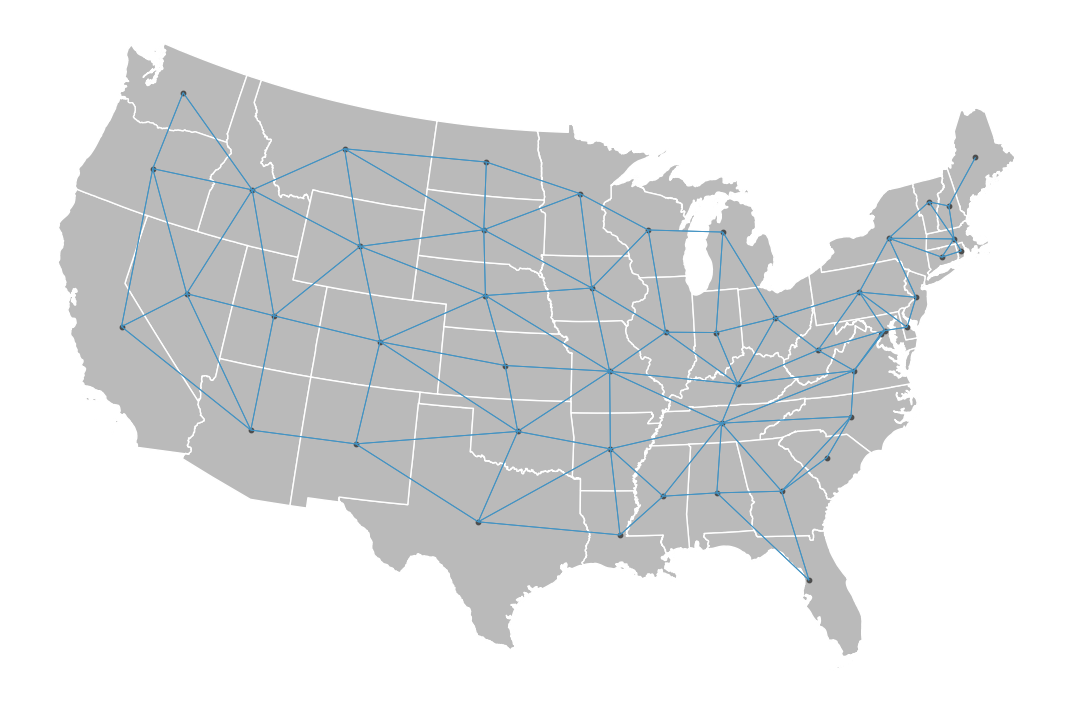

In [46]:
_ = plot_spatial_weights(wrook,join_gdf, figsize=(16,9))

In [47]:
join_gdf[join_gdf.index.isin(wrook.neighbors[18])].state

4         Nevada
13          Utah
20    California
39    New Mexico
Name: state, dtype: object

In [48]:
wrook.histogram

[(1, 1), (2, 5), (3, 9), (4, 12), (5, 9), (6, 10), (7, 1), (8, 2)]

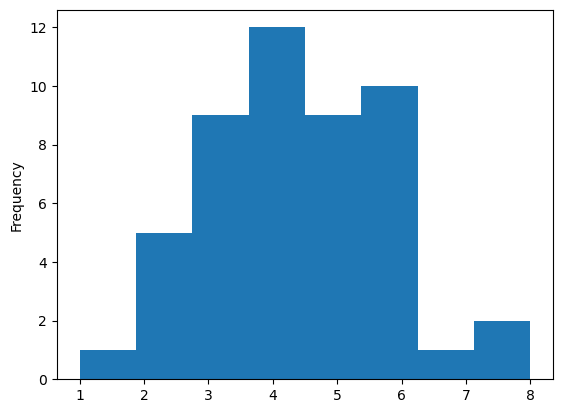

In [49]:
s = pandas.Series(wrook.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

## Distance Based Weights

### K-Nearest Neighbor

In [50]:
wk4 = libpysal.weights.distance.KNN.from_dataframe(join_gdf, k=4)

In [51]:
wk4.histogram

[(4, 49)]

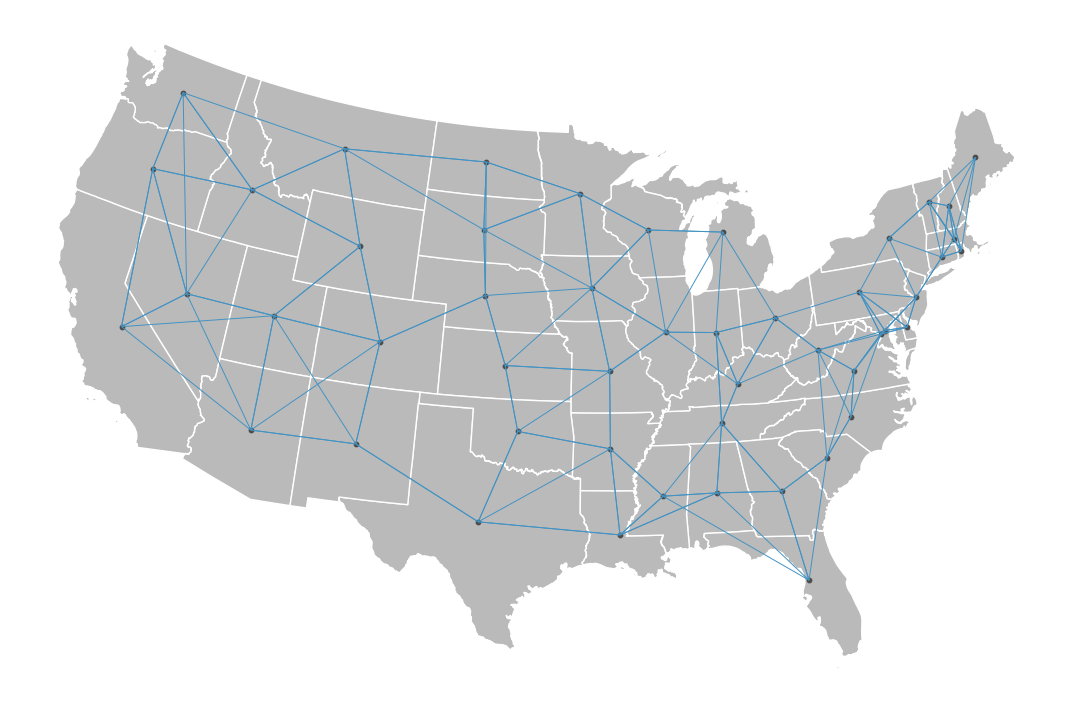

In [52]:
_ = plot_spatial_weights(wk4,join_gdf, figsize=(16,9))

In [53]:
wk4.pct_nonzero

8.16326530612245

### Distance Bands

In [54]:
w_bdb = libpysal.weights.distance.DistanceBand.from_dataframe(join_gdf, 1000000, binary=True) # 1 million meters = 621.37 miles

In [55]:
w_bdb.histogram

[(4, 1),
 (5, 2),
 (6, 1),
 (7, 3),
 (8, 4),
 (9, 1),
 (10, 4),
 (11, 3),
 (12, 1),
 (13, 4),
 (14, 3),
 (15, 5),
 (16, 2),
 (17, 2),
 (18, 3),
 (19, 1),
 (20, 1),
 (21, 3),
 (22, 4),
 (23, 0),
 (24, 1)]

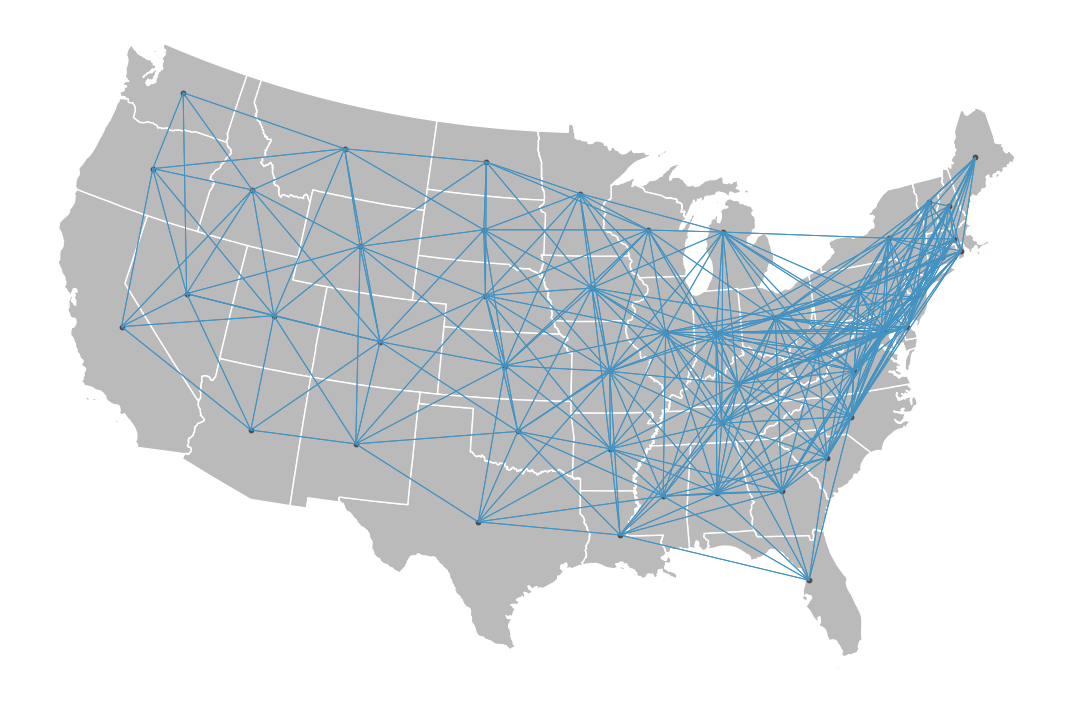

In [56]:
_ = plot_spatial_weights(w_bdb,join_gdf, figsize=(16,9))

## Uses of W

### Find largest difference between neighbors

In [57]:
w_adjlist = w.to_adjlist()

In [58]:
w_adjlist.head()

focal  neighbor  weight
0      0        38     1.0
1      1         6     1.0
2      1        10     1.0
3      1        22     1.0
4      1        38     1.0

In [59]:
y = join_gdf.rep_int.values

In [60]:
y

array([36, 27, 34, 49, 37, 30, 28, 41, 42, 39, 30, 48, 39, 54, 33, 42, 31,
       52, 40, 46, 30, 41, 32, 29, 11, 37, 41, 49, 33, 42, 41, 46, 44, 41,
       39, 44, 41, 47, 35, 37, 50, 45, 32, 43, 53, 29, 43, 43, 57])

In [61]:
import numpy as np
w_adjlist['pairdiff'] = np.abs(y[w_adjlist.focal] - y[w_adjlist.neighbor])

In [62]:
w_adjlist

focal  neighbor  weight  pairdiff
0        0        38     1.0         1
1        1         6     1.0         1
2        1        10     1.0         3
3        1        22     1.0         5
4        1        38     1.0         8
..     ...       ...     ...       ...
213     48        13     1.0         3
214     48        21     1.0        16
215     48        27     1.0         8
216     48        37     1.0        10
217     48        44     1.0         4

[218 rows x 4 columns]

In [63]:
w_adjlist.pairdiff.max()

32

In [64]:
w_adjlist[['pairdiff']].idxmax()

pairdiff    104
dtype: int64

In [65]:
w_adjlist.iloc[w_adjlist[['pairdiff']].idxmax()]

focal  neighbor  weight  pairdiff
104     24        46     1.0        32

In [66]:
join_gdf.iloc[[24, 46]]

index       GEO_ID STATE                 state LSAD  CENSUSAREA  \
24     25  0400000US11    11  District of Columbia           61.048   
46     48  0400000US51    51              Virginia        39490.086   

                                             geometry  Rep No lean  \
24  POLYGON ((1889905.340 4416707.434, 1889692.665...  11%     15%   
46  MULTIPOLYGON (((1994538.922 4338939.700, 19949...  43%     18%   

   Democrat/lean Dem.  Sample\tsize  rep_int  queen_neighbors  
24                73%           303       11                2  
46                39%           882       43                6

### Spatial Lag

In [67]:
from libpysal.weights.spatial_lag import lag_spatial

In [68]:
w.transform = 'r'

In [69]:
lag_spatial?

Signature: lag_spatial(w, y)
Docstring:
Spatial lag operator.

If w is row standardized, returns the average of each observation's neighbors;
if not, returns the weighted sum of each observation's neighbors.

Parameters
----------

w                   : W
                      libpysal spatial weightsobject
y                   : array
                      numpy array with dimensionality conforming to w (see examples)

Returns
-------

wy                  : array
                      array of numeric values for the spatial lag

Examples
--------

Setup a 9x9 binary spatial weights matrix and vector of data; compute the
spatial lag of the vector.

>>> import libpysal
>>> import numpy as np
>>> w = libpysal.weights.lat2W(3, 3)
>>> y = np.arange(9)
>>> yl = libpysal.weights.lag_spatial(w, y)
>>> yl
array([ 4.,  6.,  6., 10., 16., 14., 10., 18., 12.])

Row standardize the weights matrix and recompute the spatial lag

>>> w.transform = 'r'
>>> yl = libpysal.weights.lag_spatial(w, y)
>>> yl

In [70]:
lag_rep_int = lag_spatial(w, y)

In [71]:
lag_rep_int

array([35.        , 30.8       , 42.        , 52.25      , 41.        ,
       32.        , 31.4       , 43.75      , 40.4       , 33.83333333,
       29.5       , 44.        , 42.25      , 43.5       , 40.5       ,
       36.75      , 33.        , 42.5       , 39.8       , 43.        ,
       36.33333333, 46.57142857, 28.33333333, 33.33333333, 37.        ,
       46.5       , 44.2       , 43.66666667, 42.        , 38.25      ,
       42.5       , 43.5       , 41.71428571, 43.        , 46.5       ,
       46.75      , 43.75      , 46.5       , 30.66666667, 43.8       ,
       47.        , 41.66666667, 37.25      , 41.        , 47.16666667,
       30.        , 36.33333333, 39.8       , 48.83333333])

In [72]:
join_gdf['lag_rep_int'] = lag_rep_int

In [73]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Spatial Lag Leaning Republican')

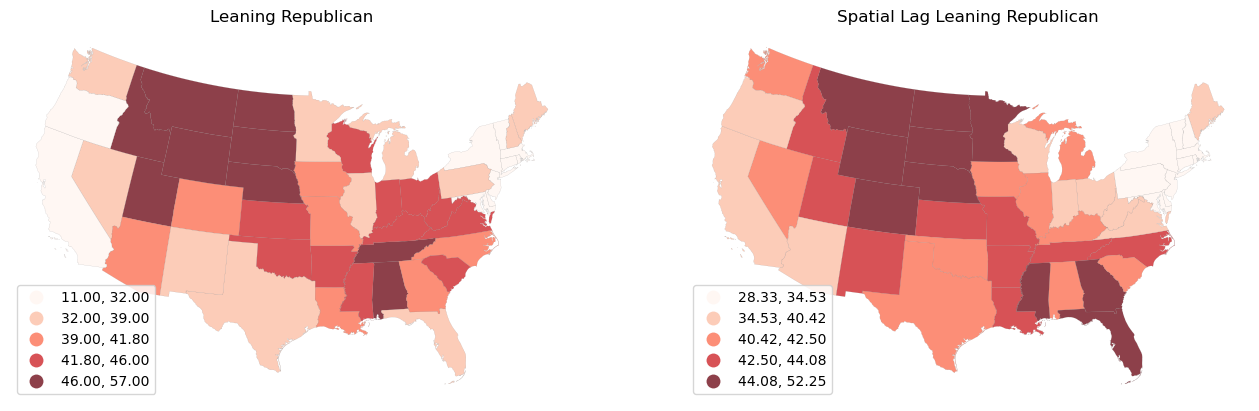

In [74]:
f, axs = plt.subplots(1, 2, figsize=(16, 9))
ax1, ax2 = axs

gdf = join_gdf

gdf.plot(column='rep_int',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax1,
        )
ax1.set_axis_off()
ax1.set_title("Leaning Republican")


gdf.plot(column='lag_rep_int',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax2,
        )
ax2.set_axis_off()
ax2.set_title("Spatial Lag Leaning Republican")

<AxesSubplot:xlabel='rep_int', ylabel='lag_rep_int'>

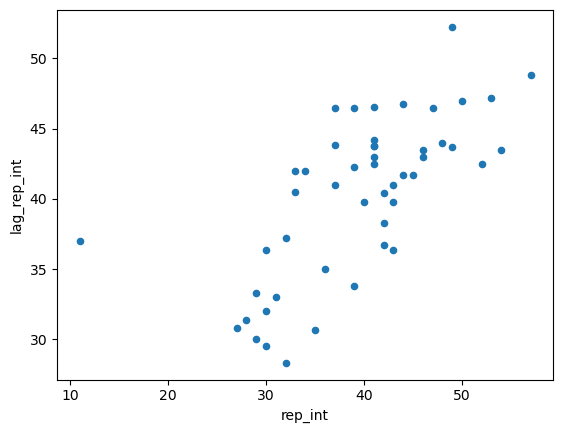

In [75]:
gdf.plot.scatter(x='rep_int', y='lag_rep_int')

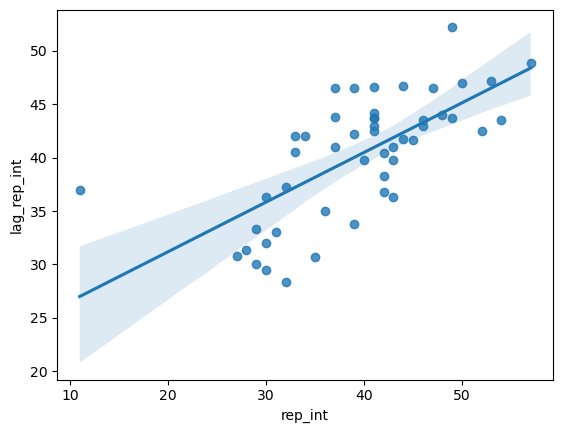

In [76]:
import seaborn as sns
_ = sns.regplot(x='rep_int', y='lag_rep_int', data=gdf)

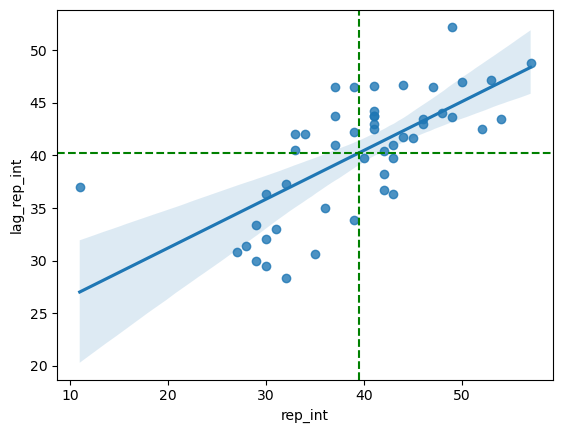

In [77]:
import seaborn as sns
_ = sns.regplot(x='rep_int', y='lag_rep_int', data=gdf)
plt.axhline(y=gdf.lag_rep_int.mean(), color='g', linestyle='--')
plt.axvline(x=gdf.rep_int.mean(), color='g', linestyle='--')

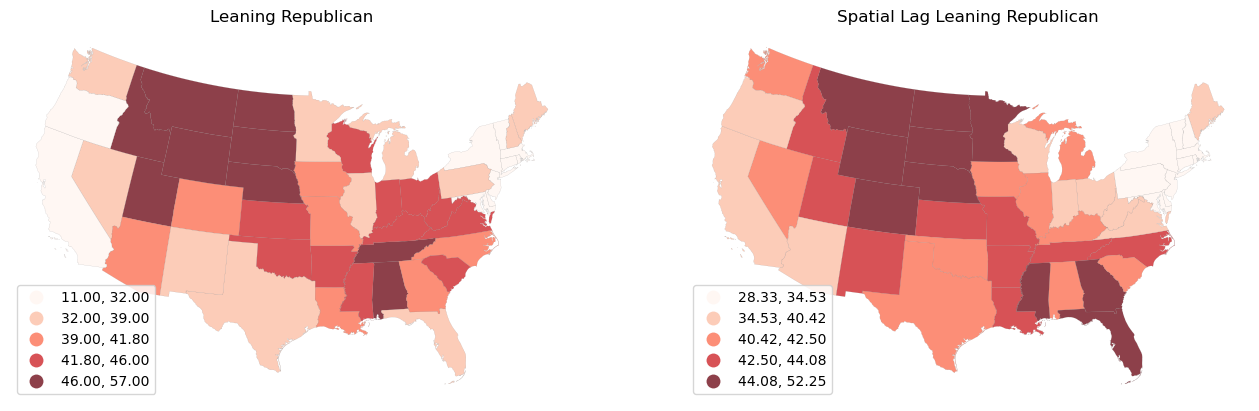

In [78]:
f, axs = plt.subplots(1, 2, figsize=(16, 9))
ax1, ax2 = axs

gdf = join_gdf

gdf.plot(column='rep_int',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax1,
        )
ax1.set_axis_off()
ax1.set_title("Leaning Republican")


gdf.plot(column='lag_rep_int',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax2,
        )
ax2.set_axis_off()
_= ax2.set_title("Spatial Lag Leaning Republican")

In [79]:
gdf.explore(column='rep_int', cmap='Reds')

In [80]:
gdf.to_parquet('repub_lean.parquet')